In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Analisi degli Incidenti negli Stati Uniti D'America nel 2016

##### Il Notebook prenderà in revisione da un Dataset del 2023 riguardante un timeframe di circa 7 anni sugli incidenti riportati. Essendo una popolazione molto grande, abbiamo scelto di analizzare solamente un campione che prende in considerazione l'Anno 2016. Al dataset è stato aggiunto un campo con il giorno della settimana e sono stati rimossi colonne circostanziali superflue all'analisi (eg.Ora della misurazione meteorologica effettuata)

In [4]:
df= pd.read_csv('incidenti_2016.csv')

#### La Severity indica quanto l'incidente è grave e/o ha arrecato disagio alla circolazione

###### La media tra tutti i valori (che spaziano da 1 a 4) è di 2.38 con una deviazione standard di 0.55. Questo può aiutare a capire come i vari incidenti provocati o registrati siano tendendi ad una gravità medio bassa e che tendono ad essere sempre in questo range, in una distribuzione quasi normale. La curtosi evidenzia invece un peso sulle code molto basso ed un leggero appuntimento verso l'alto ad indicare valori centrali che superano la media. Infine la Skewness indica una gobba leggermente spostata a destra, il che suggerisce più valori più alti (4) rispetto a quelli più bassi (1) ma che non influenzano di troppo la distribuzione

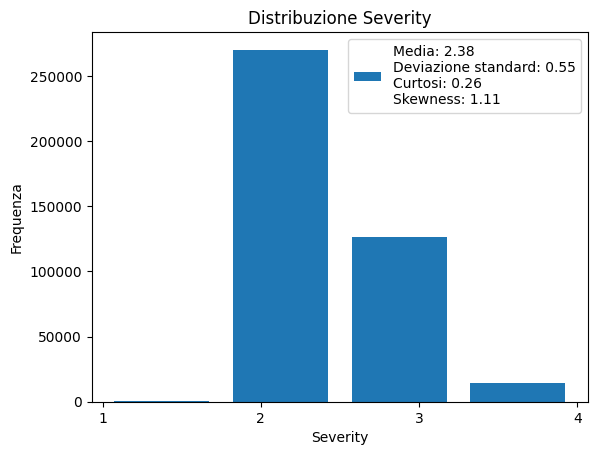

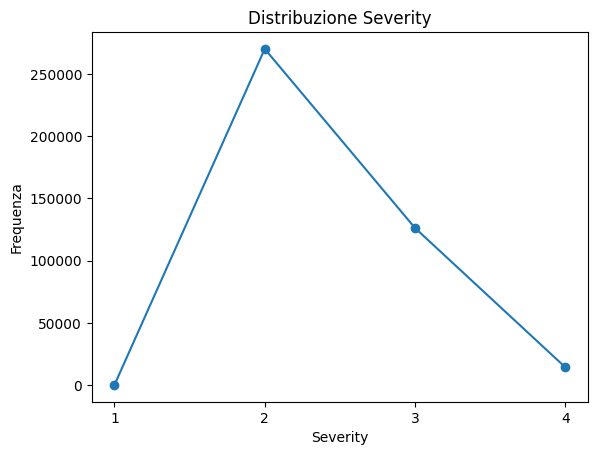

In [5]:
df['Severity'].plot(kind='hist', bins=4, rwidth=0.8)
plt.title('Distribuzione Severity')
plt.xlabel('Severity')
plt.ylabel('Frequenza')
plt.xticks([1,2,3,4])
plt.legend(['Media: {:.2f}\nDeviazione standard: {:.2f}\nCurtosi: {:.2f}\nSkewness: {:.2f}'.format(df['Severity'].mean(), df['Severity'].std(), df['Severity'].kurt(), df['Severity'].skew())])
plt.show()


df['Severity'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Distribuzione Severity')
plt.xlabel('Severity')
plt.ylabel('Frequenza')
plt.xticks([1,2,3,4])
plt.show()




#### Weather Condition indica che tempo c'era nel luogo e nell'ora dell'incidente

###### Dividendo le varie condizioni meteo tra condizioni favorevoli e sfavorevoli, possiamo notare come queste sembrino non essere un elemento predominante come causa di incidenti, ad indicare di contro una maggiore prudenza degli autisti in condizioni meteo avverse. A maggiore riprova di ciò, la cultura automobilistica degli americani sembra dare conferma a questa tesi

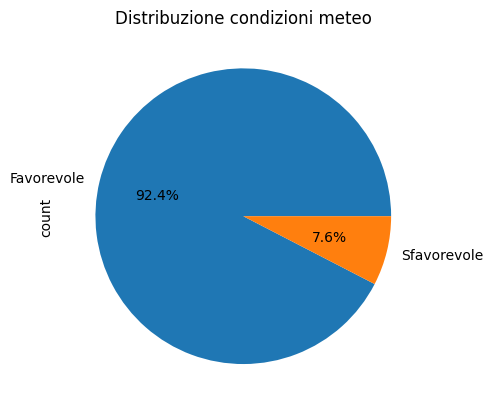

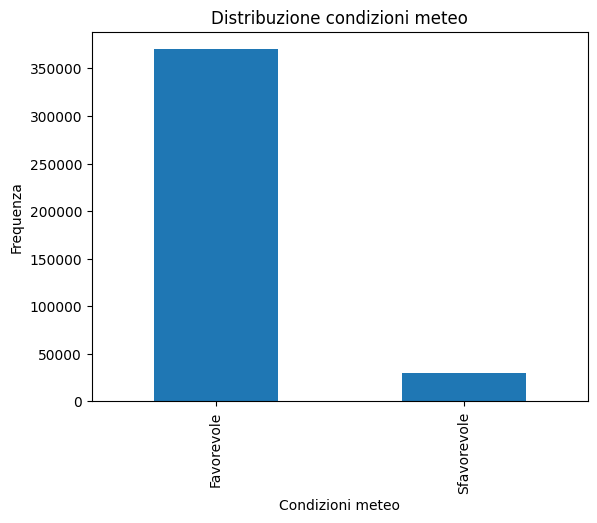

In [6]:

weather_dict = {
    'Clear': 'Favorevole',
    'Fair': 'Favorevole',
    'Overcast': 'Favorevole',
    'Partly Cloudy': 'Favorevole',
    'Mostly Cloudy': 'Favorevole',
    'Scattered Clouds': 'Favorevole',
    'Light Rain': 'Sfavorevole',
    'Rain': 'Sfavorevole',
    'Heavy Rain': 'Sfavorevole',
    'Light Snow': 'Sfavorevole',
    'Snow': 'Sfavorevole',
    'Heavy Snow': 'Sfavorevole',
    'Fog': 'Sfavorevole',
    'Haze': 'Sfavorevole',
    'Smoke': 'Sfavorevole',
    'Mist': 'Sfavorevole',
    'Thunderstorm': 'Sfavorevole',
    'Thunderstorms and Rain': 'Sfavorevole',
    'Thunderstorms and Snow': 'Sfavorevole',
    'Thunderstorms and Ice Pellets': 'Sfavorevole',
    'Ice Pellets': 'Sfavorevole',
    'Blowing Sand': 'Sfavorevole',
    'Blowing Snow': 'Sfavorevole',
    'Widespread Dust': 'Sfavorevole',
    'Sand': 'Sfavorevole',
    'Volcanic Ash': 'Sfavorevole',
    'Unknown': 'Neutro',
    'Other': 'Neutro',
    'Heavy Rain Showers': 'Sfavorevole',
    'Light Freezing Rain': 'Sfavorevole',
    'Light Freezing Drizzle': 'Sfavorevole',
    'Light Ice Pellets': 'Sfavorevole',
    'Light Thunderstorms and Rain': 'Sfavorevole',
    'Light Thunderstorm': 'Sfavorevole',
    'Light Thunderstorms and Snow': 'Sfavorevole',
    'Light Thunderstorms and Ice Pellets': 'Sfavorevole',
    'Light Snow Showers': 'Sfavorevole',
    'Light Snow Grains': 'Sfavorevole',
    'Light Snow Pellets': 'Sfavorevole',
    'Light Hail Showers': 'Sfavorevole',
    'Light Hail': 'Sfavorevole',
    'Light Ice Pellet Showers': 'Sfavorevole',
    'Heavy Thunderstorms and Rain': 'Sfavorevole',
    'Heavy Thunderstorm': 'Sfavorevole',
    'Heavy Thunderstorms and Snow': 'Sfavorevole',
    'Heavy Thunderstorms and Ice Pellets': 'Sfavorevole',
    'Heavy Snow Showers': 'Sfavorevole',
    'Heavy Snow Grains': 'Sfavorevole',
    'Heavy Snow Pellets': 'Sfavorevole',
    'Heavy Hail': 'Sfavorevole',
    'Heavy Ice Pellet Showers': 'Sfavorevole',
    'Heavy Ice Pellets': 'Sfavorevole'
}

df['Weather_Condition'] = df['Weather_Condition'].map(weather_dict)

df['Weather_Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuzione condizioni meteo')
plt.show()

df['Weather_Condition'].value_counts().plot(kind='bar')
plt.title('Distribuzione condizioni meteo')
plt.xlabel('Condizioni meteo')
plt.ylabel('Frequenza')
plt.show()



#### Gli incidenti vengono anche suddivisi per tipologia

###### Per comodità si è deciso di evidenziare gli eventi che in una qualche maniera possano mettere in relazione, da un punto di vista logico, più di un attore. Le intersezioni, i segnali di stop ed i semafori sono un chiaro esempio di questo ragionamento, mentre le distrazioni o altri fattori esterni sono rilegati ad un'altra categoria. Da questa suddivisione possiamo evincere  degli incidenti con elementi significativi abbia coinvolto più di un automobilista, superando di più di dieci volte degli eventi che potenzialmente hanno coinvolto solo un'automobilista

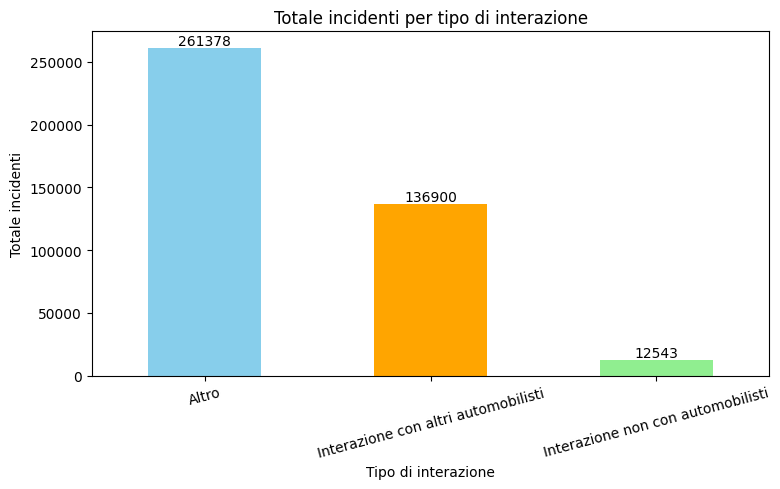

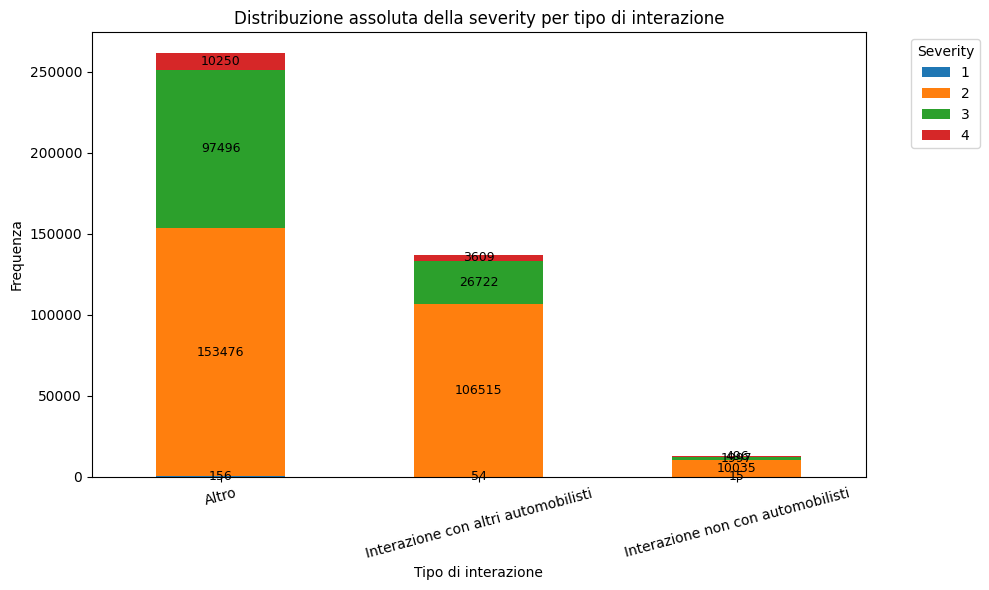

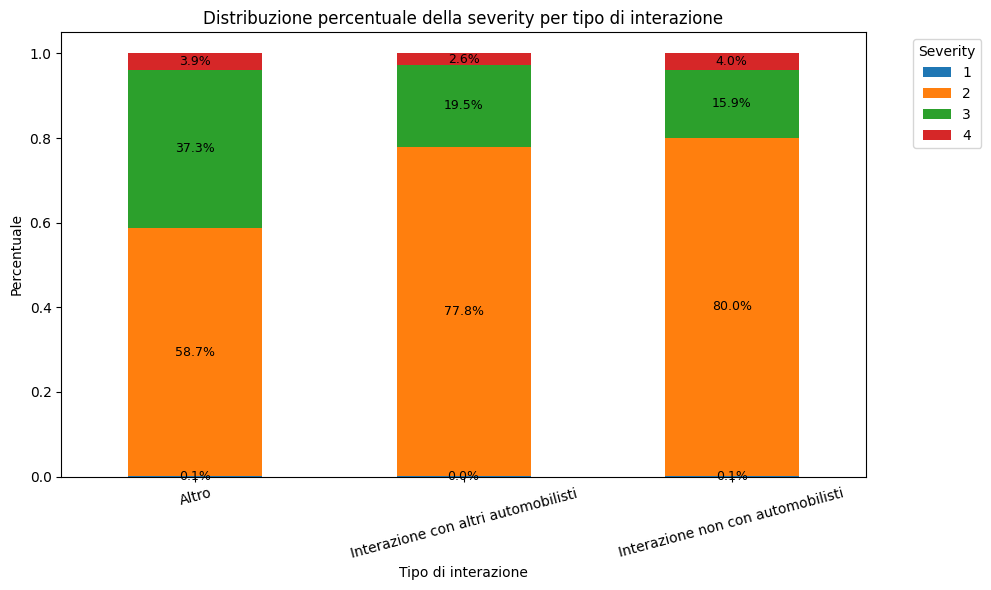

In [7]:
# Colonne che indicano interazione con altri automobilisti
auto_cols = ['Junction', 'Crossing', 'Traffic_Signal', 'Give_Way']

# Tutte le colonne strutturali rilevanti
all_cols = [
    'Junction', 'Crossing', 'Traffic_Signal', 'Give_Way', 'Stop', 'Railway',
    'Roundabout', 'Station', 'Bump', 'Traffic_Calming', 'Turning_Loop',
    'Amenity', 'No_Exit'
]

# Colonne che indicano interazione non con automobilisti
non_auto_cols = list(set(all_cols) - set(auto_cols))

# Inizializza la colonna Interaction
df['Interaction'] = 'Altro'

# Condizione 1: Interazione con altri automobilisti
mask_auto = df[auto_cols].any(axis=1)
df.loc[mask_auto, 'Interaction'] = 'Interazione con altri automobilisti'

# Condizione 2: Interazione non con automobilisti
mask_non_auto = (~mask_auto) & df[non_auto_cols].any(axis=1)
df.loc[mask_non_auto, 'Interaction'] = 'Interazione non con automobilisti'

# Condizione 3: Nessuna interazione (tutti NaN)
mask_none = df[all_cols].isna().all(axis=1)
df.loc[mask_none, 'Interaction'] = 'Nessuna interazione'

# ===================
# GRAFICO 1: Totale incidenti per tipo di interazione
interaction_totals = df['Interaction'].value_counts()
ax = interaction_totals.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen', 'gray'], figsize=(8, 5))
plt.title('Totale incidenti per tipo di interazione')
plt.xlabel('Tipo di interazione')
plt.ylabel('Totale incidenti')
plt.xticks(rotation=15)

# Aggiungi valori assoluti sopra le barre (in nero)
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posizione orizzontale
        bar.get_height() + 0.5,             # Posizione verticale
        int(bar.get_height()),              # Testo (valore assoluto)
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

# ===================
# GRAFICO 2: Distribuzione assoluta della severity per tipo di interazione
ax = df.groupby('Interaction')['Severity'].value_counts().unstack().plot(
    kind='bar', stacked=True, figsize=(10, 6)
)
plt.title('Distribuzione assoluta della severity per tipo di interazione')
plt.xlabel('Tipo di interazione')
plt.ylabel('Frequenza')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)

# Aggiungi valori assoluti all'interno delle barre (in nero)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Mostra solo se la barra ha un valore
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posizione orizzontale
                bar.get_y() + height / 2,          # Posizione verticale
                int(height),                       # Testo (valore assoluto)
                ha='center', va='center', fontsize=9, color='black'
            )

plt.tight_layout()
plt.show()


severity_distribution = df.groupby('Interaction')['Severity'].value_counts(normalize=True).unstack()
ax = severity_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuzione percentuale della severity per tipo di interazione')
plt.xlabel('Tipo di interazione')
plt.ylabel('Percentuale')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)

# Aggiungi percentuali all'interno delle barre (in nero)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Mostra solo se la barra ha un valore
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posizione orizzontale
                bar.get_y() + height / 2,          # Posizione verticale
                f'{height * 100:.1f}%',            # Testo (percentuale)
                ha='center', va='center', fontsize=9, color='black'
            )

plt.tight_layout()
plt.show()

#### Analisi su Ora e Giorno


###### In ultima analisi si è analizzato l'ora ed il giorno relative all'incidente, tenendo conto che il dataset parte da Febbraio e non dal primo di Gennaio. 

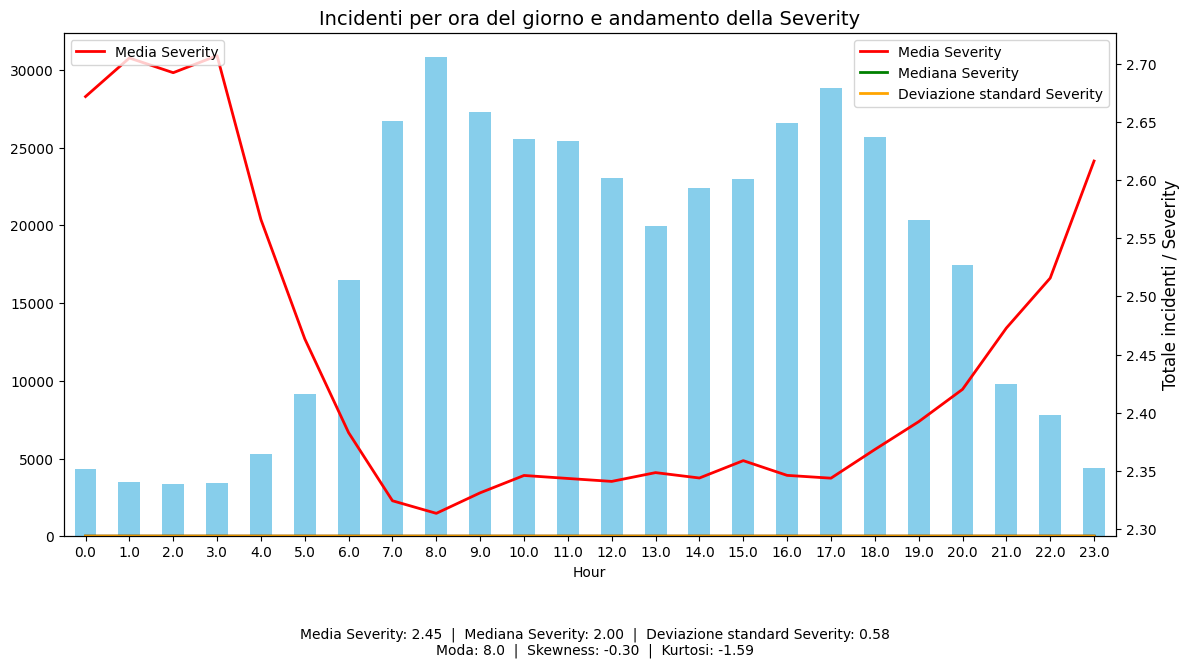

In [28]:
# Estrai l'ora e calcola la frequenza degli incidenti per ora
hourly_incidents = df['Hour'].value_counts().sort_index()

# Calcola le statistiche
moda = hourly_incidents.idxmax()
skew_val = hourly_incidents.skew()
kurt_val = hourly_incidents.kurt()

# Calcola la media, la mediana e la deviazione standard sugli incidenti totali divisi per ora
hourly_incidents_mean = df.groupby('Hour')['Severity'].mean()
hourly_incidents_median = df.groupby('Hour')['Severity'].median()
hourly_incidents_std = df.groupby('Hour')['Severity'].std()

# Crea il grafico
plt.figure(figsize=(12, 6))
hourly_incidents.plot(kind='bar', color='skyblue', label='Totale Incidenti')

# Sovrapponi l'andamento della severity per ora
hourly_incidents_mean.plot(legend=True, label='Media Severity', color='red', linewidth=2)
hourly_incidents_median.plot(legend=True, label='Mediana Severity', color='green', linewidth=2)
hourly_incidents_std.plot(legend=True, label='Deviazione standard Severity', color='orange', linewidth=2)

#fai un secondo asse per la severity
plt.twinx()
plt.ylabel('Severity')
hourly_incidents_mean.plot(legend=True, label='Media Severity', color='red', linewidth=2)

# Titolo e assi
plt.title('Incidenti per ora del giorno e andamento della Severity', fontsize=14)
plt.xlabel('Ora del giorno', fontsize=12)
plt.ylabel('Totale incidenti / Severity', fontsize=12)
plt.xticks(rotation=0)

# Testo con le statistiche
stats_text = (
    f"Media Severity: {hourly_incidents_mean.mean():.2f}  |  "
    f"Mediana Severity: {hourly_incidents_median.median():.2f}  |  "
    f"Deviazione standard Severity: {hourly_incidents_std.mean():.2f}\n"
    f"Moda: {moda}  |  "
    f"Skewness: {skew_val:.2f}  |  "
    f"Kurtosi: {kurt_val:.2f}"
)

# Inserisci il testo sotto il grafico
plt.figtext(0.5, -0.1, stats_text, ha='center', fontsize=10)

plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

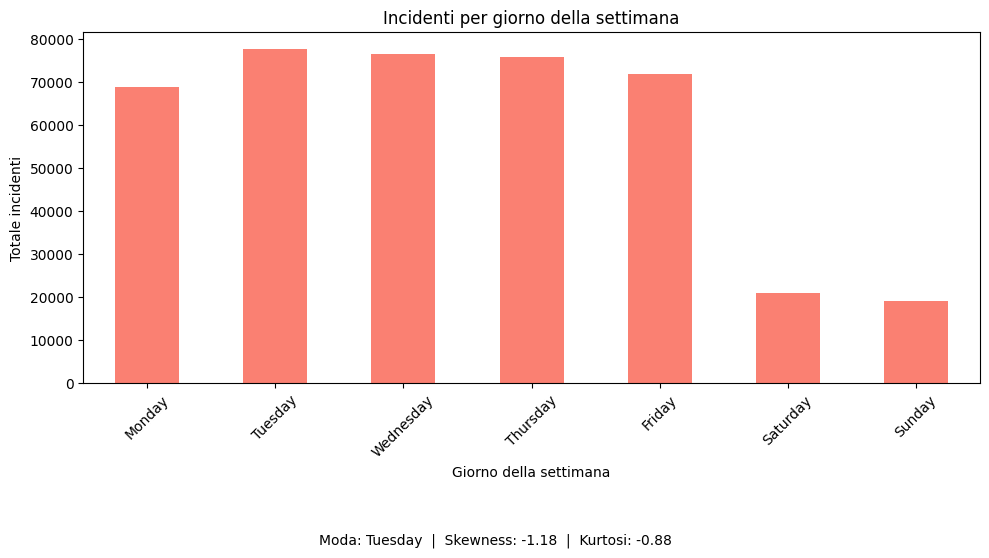

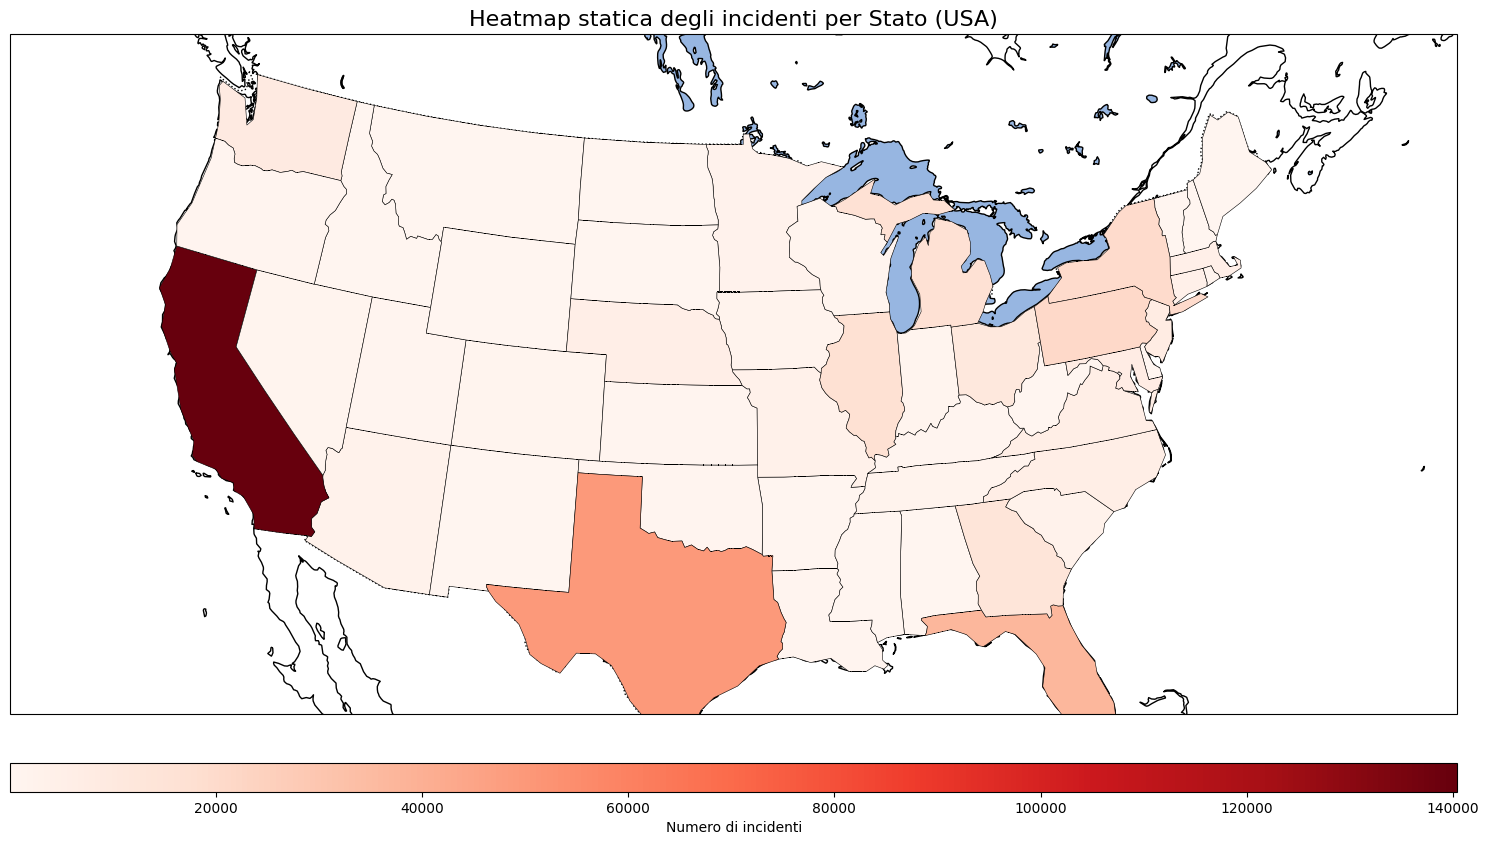

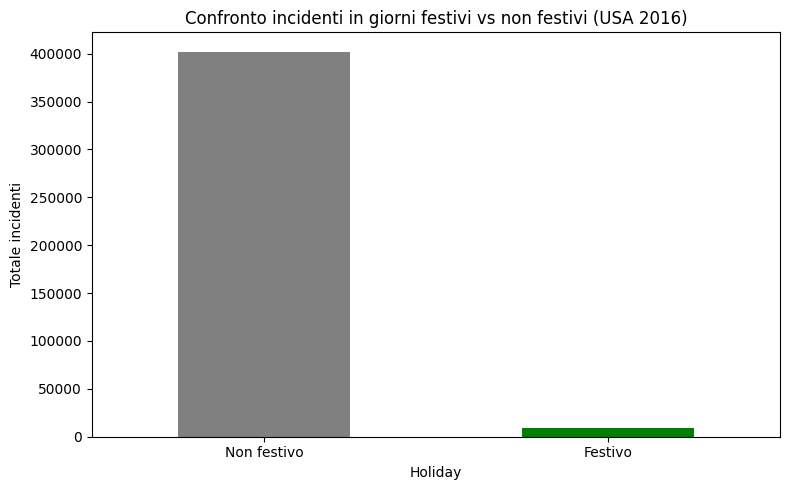

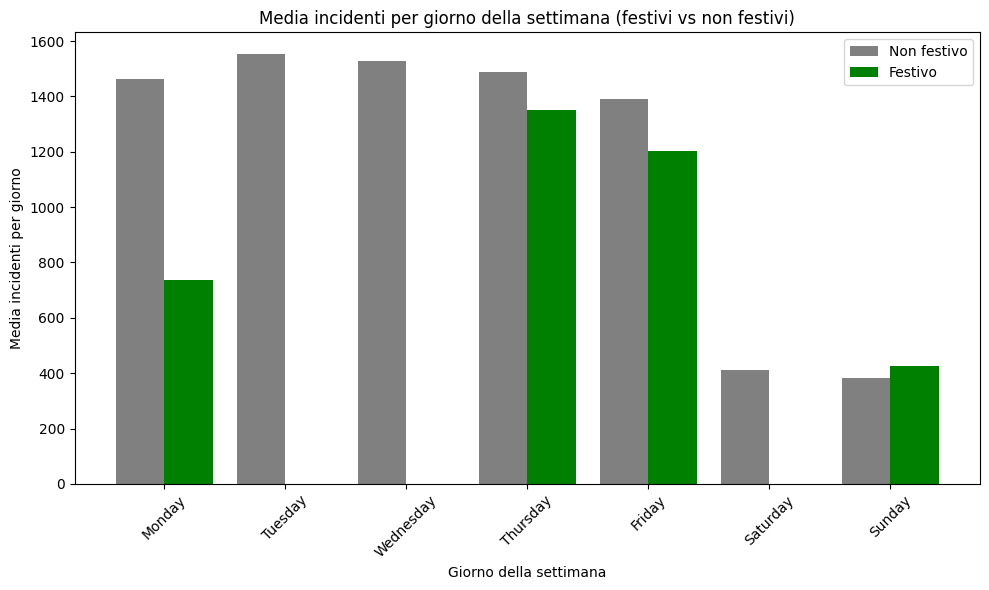

In [9]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_incidents = df['Weekday'].value_counts().reindex(weekday_order)

# Statistiche
moda_w = weekday_incidents.idxmax()
skew_w = (weekday_incidents).skew()
kurt_w = (weekday_incidents).kurt()

# Grafico
plt.figure(figsize=(10, 5))
weekday_incidents.plot(kind='bar', color='salmon')
plt.title('Incidenti per giorno della settimana')
plt.xlabel('Giorno della settimana')
plt.ylabel('Totale incidenti')
plt.xticks(rotation=45)
stats_text_w = (
    f"Moda: {moda_w}  |  "
    f"Skewness: {skew_w:.2f}  |  "
    f"Kurtosi: {kurt_w:.2f}"
)
plt.figtext(0.5, -0.1, stats_text_w, ha='center', fontsize=10)
plt.tight_layout()
plt.show()


# === 2. Heatmap statica degli USA (colori pieni con Cartopy) ===
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib import colormaps
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Conta incidenti per stato
state_incidents = df['State'].value_counts()

# Leggi shapefile dei confini USA
shapefile = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces_lakes')
reader = shpreader.Reader(shapefile)
states = list(reader.records())

# Setup mappa
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 24, 50], crs=ccrs.Geodetic())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, edgecolor='black')

# Colori
cmap = colormaps['Reds']
norm = Normalize(vmin=state_incidents.min(), vmax=state_incidents.max())

# Disegna stati colorati
for state in states:
    abbrev = state.attributes.get('postal')
    if abbrev in state_incidents:
        color = cmap(norm(state_incidents[abbrev]))
    else:
        color = 'lightgray'

    ax.add_geometries(
        [state.geometry],
        ccrs.PlateCarree(),
        facecolor=color,
        edgecolor='black',
        linewidth=0.4
    )


# Barra colore
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Numero di incidenti')

plt.title("Heatmap statica degli incidenti per Stato (USA)", fontsize=16)
plt.tight_layout()
plt.show()



# Set dei giorni festivi USA per il 2016
s_holidays = [
    '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04',
    '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25'
]
us_holidays = pd.to_datetime(s_holidays)

# Prepara il DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()
df['Holiday'] = df['Date'].isin(us_holidays)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# --- Grafico bar incidenti festivo vs non festivo ---
plt.figure(figsize=(8, 5))
df.groupby('Holiday').size().plot(kind='bar', color=['gray', 'green'])
plt.xticks([0, 1], ['Non festivo', 'Festivo'], rotation=0)
plt.title('Confronto incidenti in giorni festivi vs non festivi (USA 2016)')
plt.ylabel('Totale incidenti')
plt.tight_layout()
plt.show()

# --- Calcolo incidenti per giorno della settimana ---
holiday_weekday_avg = df[df['Holiday']].groupby('Weekday').size().reindex(weekday_order).fillna(0)
nonholiday_weekday_avg = df[~df['Holiday']].groupby('Weekday').size().reindex(weekday_order).fillna(0)

# --- Conteggio effettivo dei giorni festivi per giorno della settimana ---
holiday_weekdays = us_holidays.day_name()
holiday_day_counts = holiday_weekdays.value_counts().reindex(weekday_order).fillna(0)

# --- Conteggio dei giorni non festivi per giorno della settimana ---
all_days = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
non_holiday_days = all_days[~all_days.isin(us_holidays)]
nonholiday_day_counts = pd.Series(non_holiday_days.day_name()).value_counts().reindex(weekday_order).fillna(0)

# --- Calcolo delle medie corrette ---
holiday_avg = (holiday_weekday_avg / holiday_day_counts).fillna(0)
nonholiday_avg = (nonholiday_weekday_avg / nonholiday_day_counts).fillna(0)

# --- Grafico comparativo ---
plt.figure(figsize=(10, 6))
bar_width = 0.4
plt.bar([i - bar_width/2 for i in range(7)], nonholiday_avg, width=bar_width, label='Non festivo', color='gray')
plt.bar([i + bar_width/2 for i in range(7)], holiday_avg, width=bar_width, label='Festivo', color='green')
plt.xticks(range(7), weekday_order, rotation=45)
plt.xlabel('Giorno della settimana')
plt.ylabel('Media incidenti per giorno')
plt.title('Media incidenti per giorno della settimana (festivi vs non festivi)')
plt.legend()
plt.tight_layout()
plt.show()


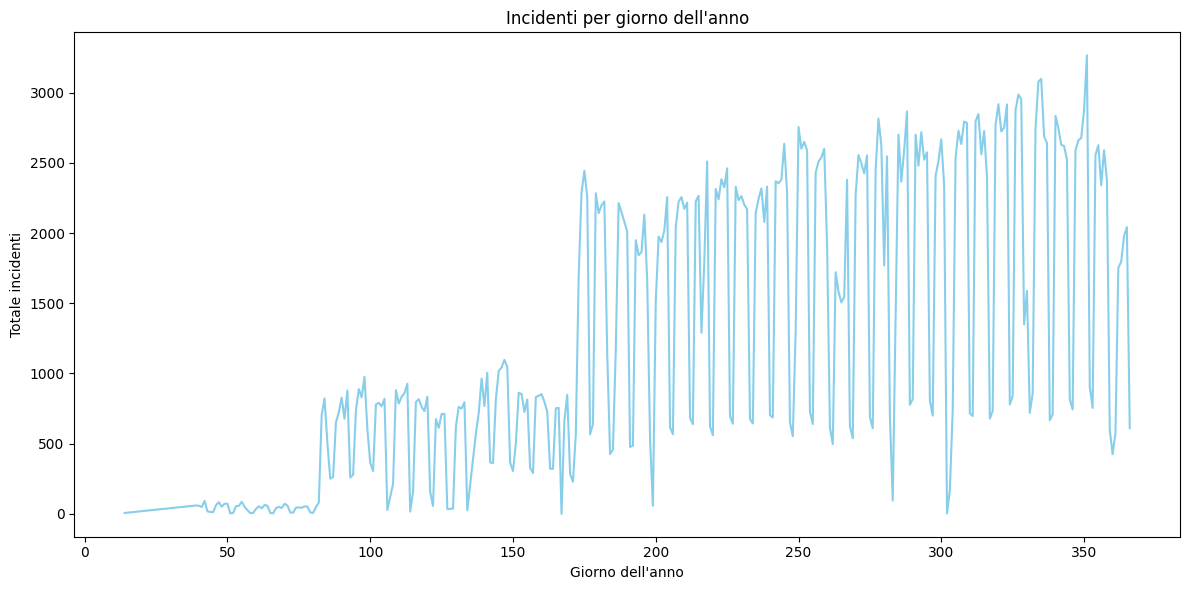

In [19]:
# Fammi la distribuzione per giorno dell'anno
day_of_year = df['Date'].dt.dayofyear
day_of_year_avg = day_of_year.value_counts().sort_index()

# Fammi il grafico
plt.figure(figsize=(12, 6))
day_of_year_avg.plot(kind='line', color='skyblue')
plt.title('Incidenti per giorno dell\'anno')
plt.xlabel('Giorno dell\'anno')
plt.ylabel('Totale incidenti')
plt.tight_layout()
plt.show()


###### Bibliografia: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents